In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error
import numpy as np
from catboost import CatBoostClassifier

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
dataset = pd.read_excel("C:/Users/NT551/Desktop/06.17 깃/dataset_draft2.xlsx", index_col=0, dtype={"gameId": "str"})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7194 entries, 0 to 7193
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameId             7194 non-null   object 
 1   headtoHeadWinrate  7194 non-null   float64
 2   teamWinrateDiff    7194 non-null   float64
 3   Blue_Top_kda       7194 non-null   float64
 4   Blue_Jgl_kda       7194 non-null   float64
 5   Blue_Mid_kda       7194 non-null   float64
 6   Blue_Adc_kda       7194 non-null   float64
 7   Blue_Spt_kda       7194 non-null   float64
 8   Red_Top_kda        7194 non-null   float64
 9   Red_Jgl_kda        7194 non-null   float64
 10  Red_Mid_kda        7194 non-null   float64
 11  Red_Adc_kda        7194 non-null   float64
 12  Red_Spt_kda        7194 non-null   float64
 13  winner             7194 non-null   object 
dtypes: float64(12), object(2)
memory usage: 843.0+ KB


In [4]:
dataset["winner"].head()

0     Red
1     Red
2     Red
3     Red
4    Blue
Name: winner, dtype: object

In [5]:
label_encoder = LabelEncoder()
dataset["winner"] = label_encoder.fit_transform(dataset["winner"])
dataset["winner"].head()

0    1
1    1
2    1
3    1
4    0
Name: winner, dtype: int32

In [6]:
dropped_dataset = dataset.drop(["gameId"], axis=1)
desired_X_column_list = list(dropped_dataset.columns)
desired_X_column_list.remove("winner")
dropped_dataset = dropped_dataset.drop_duplicates(subset=desired_X_column_list)

In [7]:
y = dropped_dataset["winner"]
X = dropped_dataset.drop(["winner"], axis=1)
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7186 entries, 0 to 7193
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   headtoHeadWinrate  7186 non-null   float64
 1   teamWinrateDiff    7186 non-null   float64
 2   Blue_Top_kda       7186 non-null   float64
 3   Blue_Jgl_kda       7186 non-null   float64
 4   Blue_Mid_kda       7186 non-null   float64
 5   Blue_Adc_kda       7186 non-null   float64
 6   Blue_Spt_kda       7186 non-null   float64
 7   Red_Top_kda        7186 non-null   float64
 8   Red_Jgl_kda        7186 non-null   float64
 9   Red_Mid_kda        7186 non-null   float64
 10  Red_Adc_kda        7186 non-null   float64
 11  Red_Spt_kda        7186 non-null   float64
dtypes: float64(12)
memory usage: 729.8 KB


,headtoHeadWinrate,teamWinrateDiff,Blue_Top_kda,Blue_Jgl_kda,Blue_Mid_kda,Blue_Adc_kda,Blue_Spt_kda,Red_Top_kda,Red_Jgl_kda,Red_Mid_kda,Red_Adc_kda,Red_Spt_kda
count,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000
mean,0.495032,0.002247,4.449447,5.523627,5.805321,6.215525,5.571591,4.525516,5.585778,5.835178,6.270523,5.626717
std,0.184156,0.202314,1.767133,2.190089,2.251527,2.270794,2.326657,1.799513,2.208664,2.256379,2.312226,2.339714
min,0.083333,-0.677419,0.190476,0.569286,0.125000,0.511111,0.359524,0.166667,0.255952,0.166667,0.641667,0.111111
25%,0.333333,-0.130081,3.215000,3.967024,4.290000,4.650000,3.883333,3.279107,4.022649,4.276667,4.696667,3.980000
50%,0.500000,0.000000,4.411389,5.484813,5.705193,6.129330,5.434881,4.427688,5.484813,5.705193,6.129330,5.434881
75%,0.642857,0.131251,5.571429,6.918750,7.186667,7.653333,6.984583,5.611250,6.988750,7.242500,7.701250,7.022798
max,0.923077,0.696970,13.840000,14.450000,17.866667,17.466667,21.800000,14.733333,14.443333,17.333333,15.750000,16.250000


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6203059805285118


In [11]:
param_grid = {
    'depth': [3, 5, 7, 10],          # 대체: max_depth
    'learning_rate': [0.01, 0.05, 0.1, 0.3],  # 동일
    'iterations': [100, 200, 300, 400],       # 대체: n_estimators
    'subsample': [0.5, 0.7, 1.0],  # 대체: bagging_temperature
    'l2_leaf_reg': [0, 0.1, 0.5, 1, 1.5, 2],  # 대체: l2_leaf_reg (정규화 파라미터로 사용)
    'min_data_in_leaf': [1, 3, 5],  # 대체: min_child_weight (명시적 설정)
}

In [12]:
grid_search = GridSearchCV(estimator=CatBoostClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1)

In [14]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 31104 candidates, totalling 93312 fits


In [15]:
y_pred_best = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
print(f'Accuracy: {accuracy}')

Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [20]:
feature_importances = best_model.get_feature_importance()
features = list(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df.head(10)  # Top 10 features

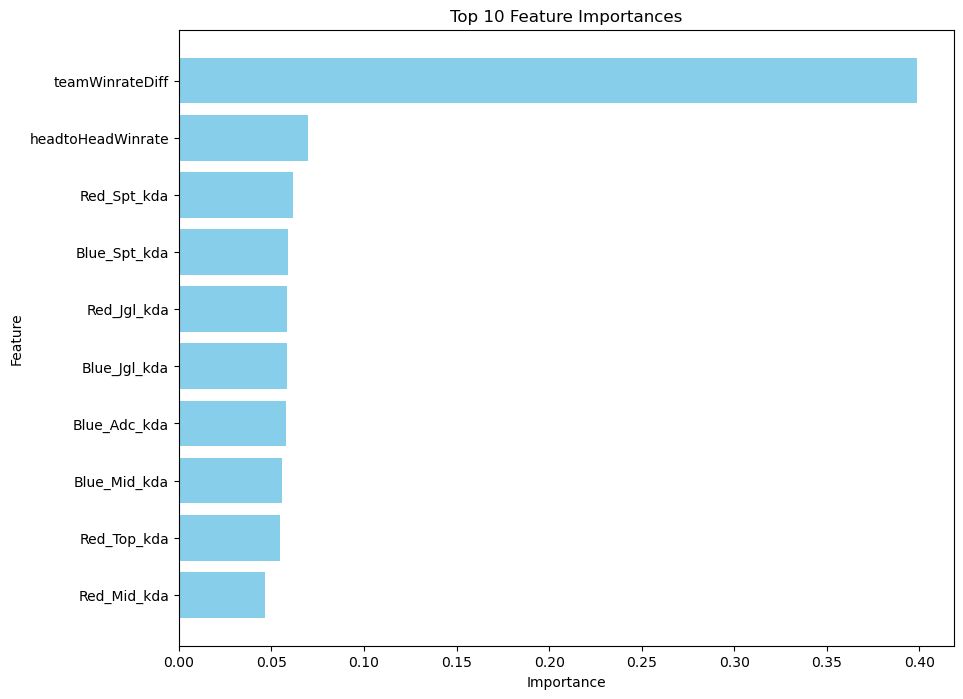

In [21]:
plt.figure(figsize=(10, 30))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()